In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Uvelka/Data_ForeCasting')

In [3]:
import pandas as pd
import numpy as np

# Загрузка данных

In [14]:
DATAPAH = '/content/drive/MyDrive/Colab Notebooks/Uvelka/Data/'

In [15]:
df = pd.read_csv(DATAPAH + 'data.csv', date_format = "%d/%m/%Y", parse_dates=['Дата/Время'], decimal = ',', dayfirst=True).iloc[:-1 , :]
df = df.copy()
df = df.drop(['Токовый ремни Афл3.4.Максим RMS', 'Токовый губки  Афл3.5.Максим RMS'], axis=1)
df = df.fillna(df.iloc[:,1:].rolling(28, min_periods=1, center=True).mean())

In [16]:
df.head()

,Дата/Время,Токовый ремни Афл3.1.Максим RMS,Токовый губки Афл3.1.Максим RMS,Токовый нипроллер Афл3.1.Максим RMS,Токовый губки Афл3.2.Максим RMS,Токовый нипроллер Афл3.2.Максим RMS,Токовый ремни Афл3.2.Максим RMS,Токовый ремни Афл3.3.Максим RMS,Токовый нипроллер Афл3.3.Максим RMS,Токовый губки Афл3.3.Максим RMS,Токовый губки Афл3.4.Максим RMS,Токовый нипроллер Афл3.4.Максим RMS,Токовый нипроллер Афл3.5.Максим RMS,Токовый ремни Афл3.5.Максим RMS
0,16.10.2024 0:00:00,16.6,9.9,1.6,11.3,0.1,0.0,15.6,0.2,6.8,17.3,2.6,3.2,13.4
1,16.10.2024 0:00:01,0.0,2.9,1.3,6.3,0.1,0.0,11.5,2.2,11.2,16.3,2.6,3.8,7.9
2,16.10.2024 0:00:02,0.0,7.0,0.0,7.8,0.1,0.0,6.3,2.0,11.9,11.7,2.8,1.6,10.8
3,16.10.2024 0:00:03,9.3,14.8,1.8,0.0,0.1,0.0,10.6,0.0,11.7,11.7,2.7,1.7,9.8
4,16.10.2024 0:00:04,9.2,8.2,0.0,13.9,0.1,0.0,9.6,2.5,8.8,11.7,2.6,3.3,13.7


In [19]:
df.columns

Index(['Дата/Время', 'Токовый ремни Афл3.1.Максим RMS',
       'Токовый губки  Афл3.1.Максим RMS',
       'Токовый нипроллер  Афл3.1.Максим RMS',
       'Токовый губки  Афл3.2.Максим RMS',
       'Токовый нипроллер  Афл3.2.Максим RMS',
       'Токовый ремни Афл3.2.Максим RMS', 'Токовый ремни Афл3.3.Максим RMS',
       'Токовый нипроллер  Афл3.3.Максим RMS',
       'Токовый губки  Афл3.3.Максим RMS', 'Токовый губки  Афл3.4.Максим RMS',
       'Токовый нипроллер  Афл3.4.Максим RMS',
       'Токовый нипроллер  Афл3.5.Максим RMS',
       'Токовый ремни Афл3.5.Максим RMS'],
      dtype='object')

In [24]:
# Импортируем либы
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [48]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(12,7)})

In [49]:
x = pd.to_datetime(df['Дата/Время'], dayfirst=True).dt.time.astype(str)

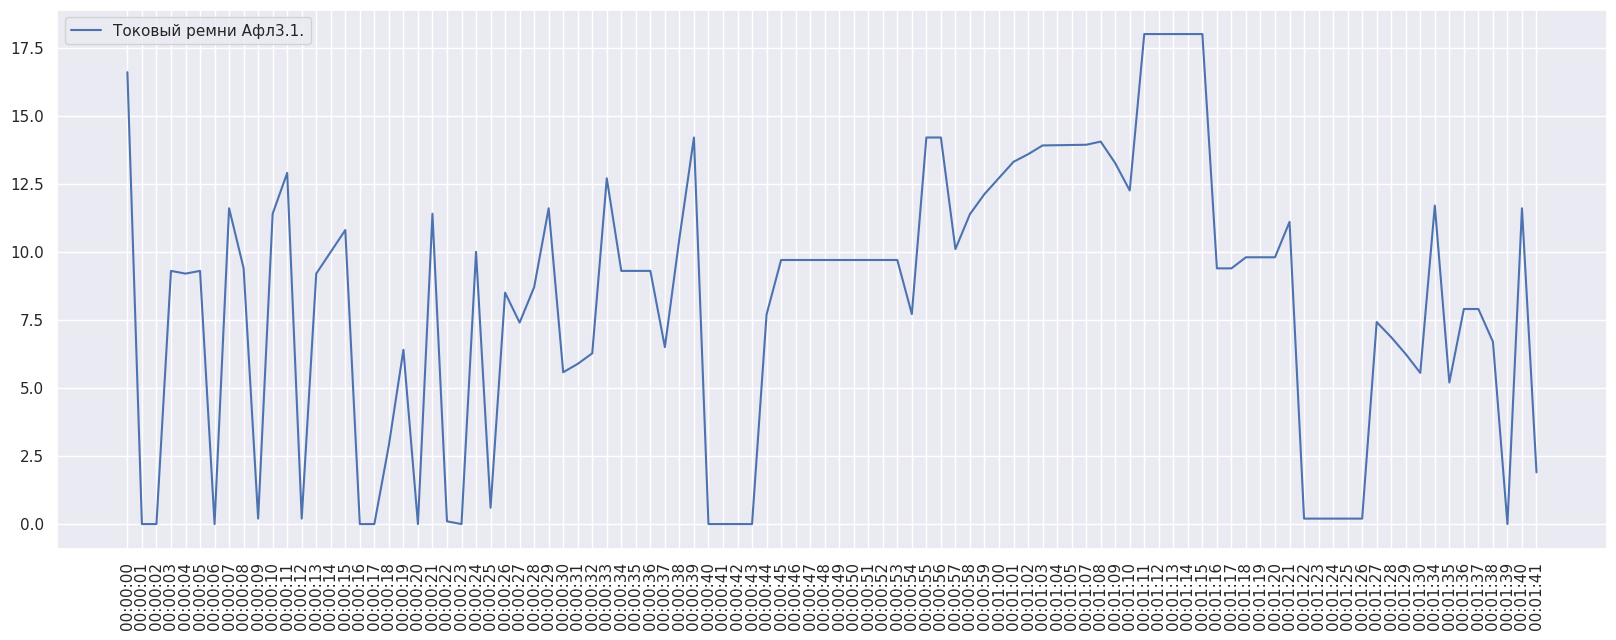

In [51]:
plt.figure(figsize=(20,7))

y1 = df['Токовый ремни Афл3.1.Максим RMS']

plt.plot(x, y1, "-b", label="Токовый ремни Афл3.1.")

plt.xticks(rotation='vertical')
plt.legend(loc="upper left")

plt.show()

# Prophet

In [52]:
df_prophet = pd.DataFrame()
df_prophet[['ds','y']] = df[['Дата/Время', 'Токовый ремни Афл3.1.Максим RMS']]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], dayfirst=True)

In [53]:
df_prophet

,ds,y
0,2024-10-16 00:00:00,16.6
1,2024-10-16 00:00:01,0.0
2,2024-10-16 00:00:02,0.0
3,2024-10-16 00:00:03,9.3
4,2024-10-16 00:00:04,9.2
...,...,...
93,2024-10-16 00:01:37,7.9
94,2024-10-16 00:01:38,6.7
95,2024-10-16 00:01:39,0.0
96,2024-10-16 00:01:40,11.6


In [77]:
predictions = 30
train_df = df_prophet[:-predictions]

In [78]:
m = Prophet()
m.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkub44wft/khmf_swn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkub44wft/s1d0o1b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66247', 'data', 'file=/tmp/tmpkub44wft/khmf_swn.json', 'init=/tmp/tmpkub44wft/s1d0o1b1.json', 'output', 'file=/tmp/tmpkub44wft/prophet_modelprw8vlhr/prophet_model-20241103141426.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:14:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chai

In [115]:
# Предсказываем 30 секунд
future = m.make_future_dataframe(periods=predictions, freq='s')
forecast = m.predict(future)

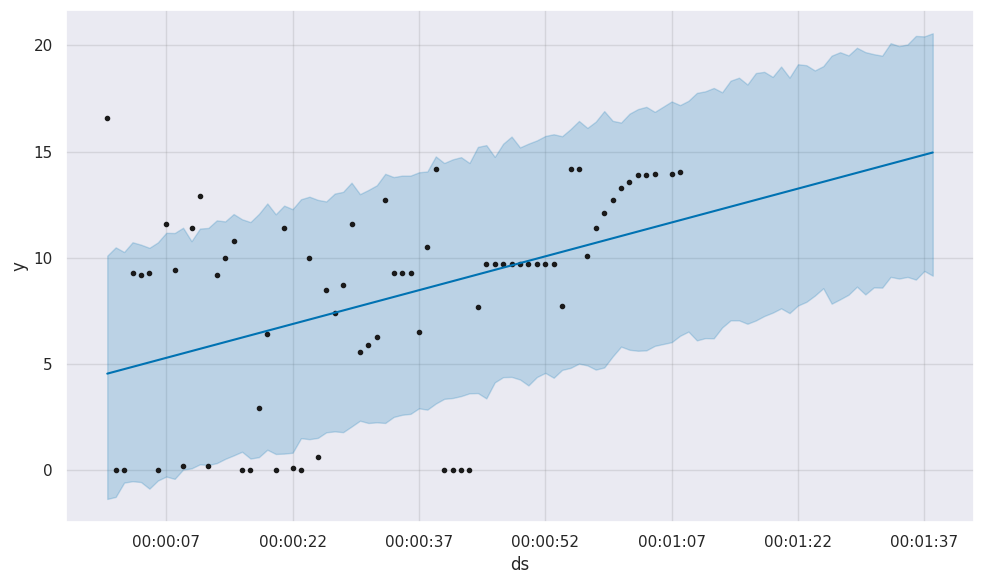

In [116]:
m.plot(forecast);

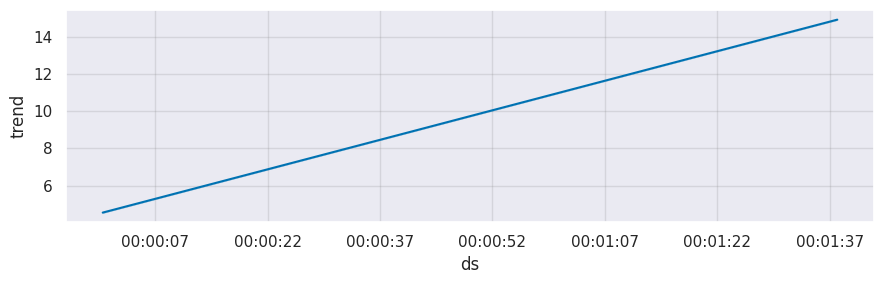

In [117]:
# Смотрим на компоненты
m.plot_components(forecast);

In [121]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_prophet.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  1277.5593004505558 %
MAE (средняя абсолютная ошибка) –  6.612702866803489


# ARIMA

In [85]:
df_arima = pd.DataFrame()
df_arima[['time','y']] = df[['Дата/Время', 'Токовый ремни Афл3.1.Максим RMS']]
df_arima['time'] = pd.to_datetime(df_arima['time'], dayfirst=True)

In [86]:
df_arima

,time,y
0,2024-10-16 00:00:00,16.6
1,2024-10-16 00:00:01,0.0
2,2024-10-16 00:00:02,0.0
3,2024-10-16 00:00:03,9.3
4,2024-10-16 00:00:04,9.2
...,...,...
93,2024-10-16 00:01:37,7.9
94,2024-10-16 00:01:38,6.7
95,2024-10-16 00:01:39,0.0
96,2024-10-16 00:01:40,11.6


In [99]:
y = df_arima['y']

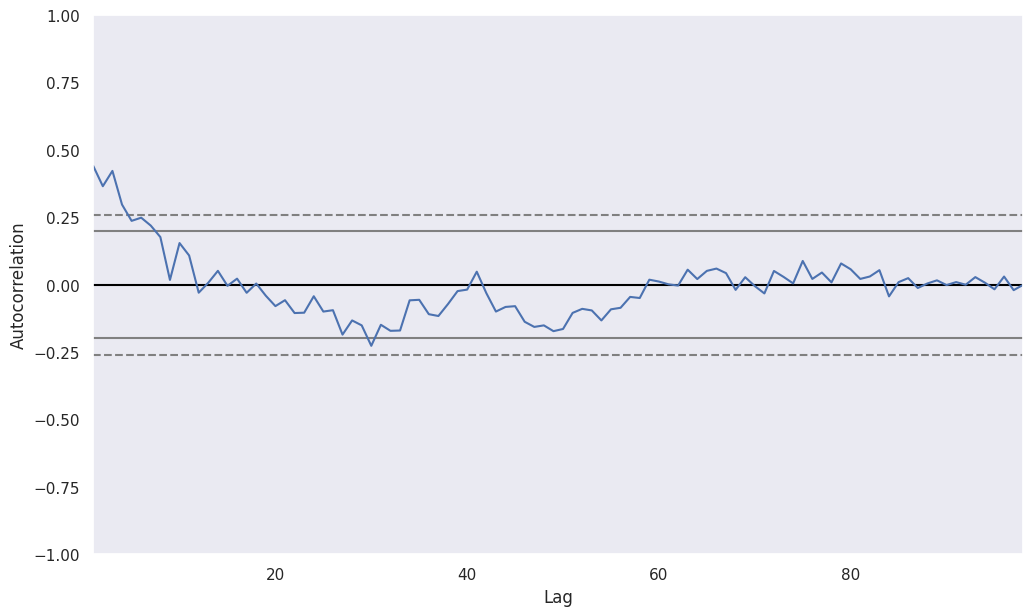

In [101]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)
#plt.xticks(np.arange(0, 101, 1))
plt.show()

При рассмотрении примера мы видим, что существует положительная корреляция с первыми 5 лагами, которая, возможно, значима для первых 5 лагов.

Дифференцирование

In [109]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(y)
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.014955
p-value: 0.001334


Ниже 0.05 Дифференцирование не нужно

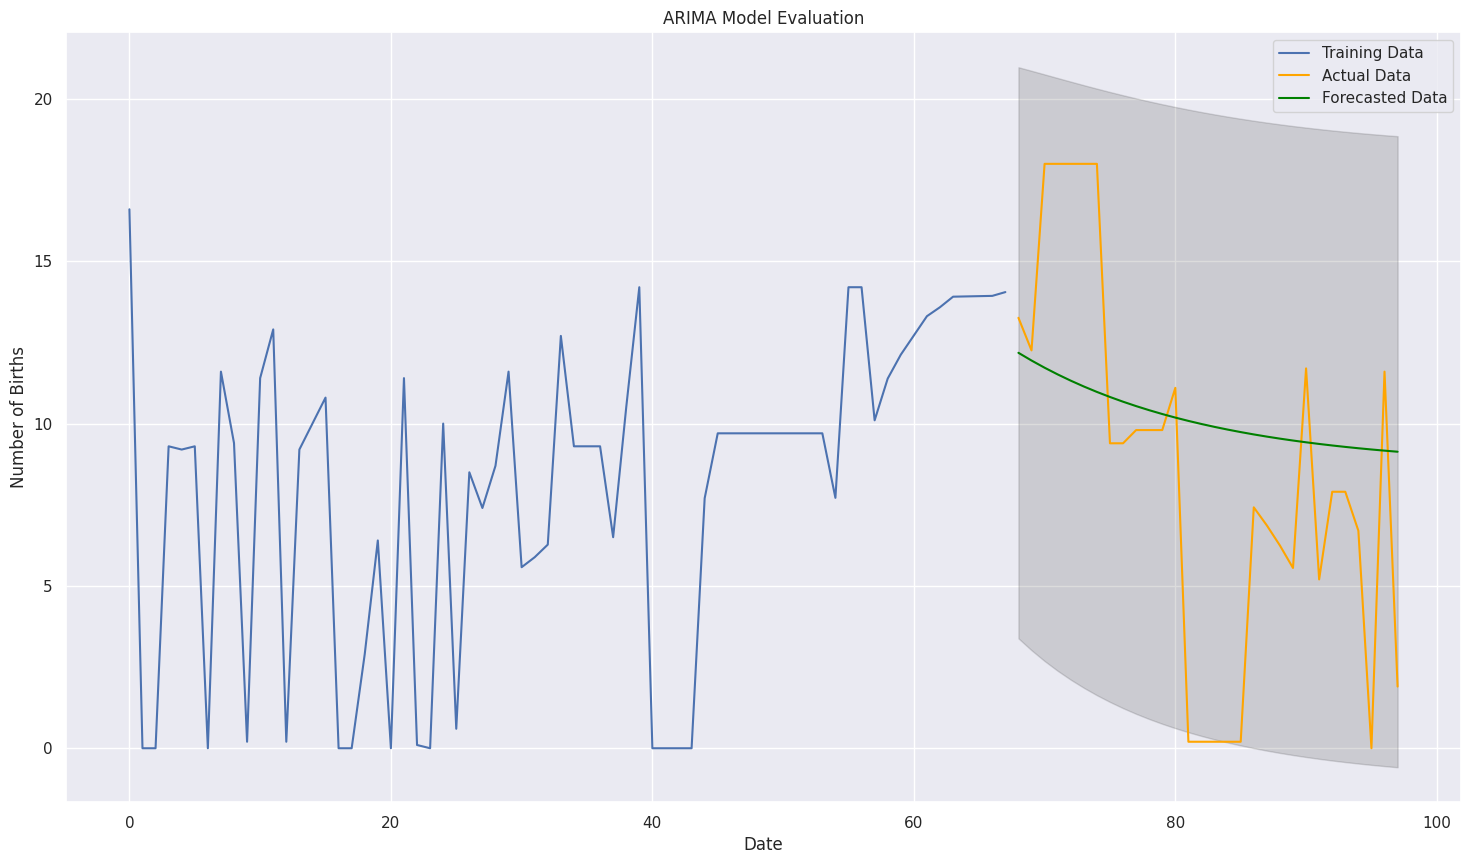

MAE: 4.385521214761087


In [120]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Split the data into train and test
train_size = int(len(y) * 0.7)
train, test = y[0:train_size], y[train_size:len(y)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mae = mean_absolute_error(test, test_forecast_series)
#rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(18,10))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('MAE:', mae)